In [ ]:
import json
with open('allennlp.json', 'r') as openfile:
  read_json = json.load(openfile)
triplets = read_json["results"]
for triple in triplets:
  assert len(triple) == 3
triplets

[['Dániel Kondor',
  'is author of',
  'Do the rich get richer? An empirical analysis of the BitCoin transaction network'],
 ['by the scarcity of available data',
  'limited',
  'The possibility to analyze everyday monetary transactions'],
 ['Present econophysics models',
  'employed',
  'on presumed random networks of interacting agents , and only some macroscopic properties ( e.g.'],
 ['on presumed random networks of interacting agents , and only some macroscopic properties ( e.g.',
  'employed',
  'usually'],
 ['the resulting wealth distribution )', 'compared', 'to real - world data'],
 ['Dániel Kondor',
  'analyze',
  'Bitcoin , which is a novel digital currency system , where the complete list of transactions is publicly available'],
 ['Bitcoin which',
  'is',
  'a novel digital currency system , where the complete list of transactions is publicly available'],
 ['the complete list of transactions', 'is', 'publicly available'],
 ['Dániel Kondor', 'reconstruct', 'the network of tran

## Word2Vec model

In [ ]:
from gensim.models import Word2Vec
embedding_size = 200
model = Word2Vec(triplets, min_count = 1, size = embedding_size, workers = 3, window = 3, sg = 1)

In [ ]:
model.build_vocab(triplets, update = True)
model.train(triplets, total_examples = model.corpus_count, epochs = 100)

(204787, 225600)

In [ ]:
len(model.wv.vocab)

1358

In [ ]:
model.wv.vocab

{'Dániel Kondor': <gensim.models.keyedvectors.Vocab at 0x7f5c0e1e6050>,
 'is author of': <gensim.models.keyedvectors.Vocab at 0x7f5c0e1e61d0>,
 'Do the rich get richer? An empirical analysis of the BitCoin transaction network': <gensim.models.keyedvectors.Vocab at 0x7f5c0e1e6210>,
 'by the scarcity of available data': <gensim.models.keyedvectors.Vocab at 0x7f5c0a59d750>,
 'limited': <gensim.models.keyedvectors.Vocab at 0x7f5bff5c0e50>,
 'The possibility to analyze everyday monetary transactions': <gensim.models.keyedvectors.Vocab at 0x7f5bff5d0690>,
 'Present econophysics models': <gensim.models.keyedvectors.Vocab at 0x7f5bff56f8d0>,
 'employed': <gensim.models.keyedvectors.Vocab at 0x7f5bff56f890>,
 'on presumed random networks of interacting agents , and only some macroscopic properties ( e.g.': <gensim.models.keyedvectors.Vocab at 0x7f5bff852bd0>,
 'usually': <gensim.models.keyedvectors.Vocab at 0x7f5bff5c0e90>,
 'the resulting wealth distribution )': <gensim.models.keyedvectors.Voc

In [ ]:
model['Bitcoin'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(200,)

In [ ]:
model.similarity('Bitcoin', 'the blockchain mechanism')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9941502

## Converting Word Embeddings into DataFrame

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame()
for i in range(embedding_size):
  df[i] = np.nan
for i in model.wv.vocab:
  df.loc[i] = model[i]

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Dániel Kondor,0.002571,0.137527,0.010978,0.144259,-0.075581,0.173135,-0.265481,0.029346,-0.075963,-0.022185,...,-0.029672,0.139609,0.042092,-0.065690,0.004594,0.094708,-0.055344,-0.001715,-0.047177,0.002146
is author of,0.006653,0.136838,0.039396,0.149559,-0.107858,0.169278,-0.289533,0.019207,-0.033009,-0.023114,...,-0.025070,0.119192,0.038836,-0.078555,-0.010019,0.090492,-0.077114,0.003871,-0.044646,-0.000834
Do the rich get richer? An empirical analysis of the BitCoin transaction network,-0.005342,0.047727,0.006438,0.049512,-0.027510,0.051967,-0.081132,0.008383,-0.020740,-0.003740,...,-0.007599,0.041425,0.015639,-0.022335,-0.003052,0.031552,-0.024827,0.000146,-0.012380,-0.006367
by the scarcity of available data,-0.001002,0.091243,0.013629,0.095730,-0.066089,0.105974,-0.160401,0.015973,-0.032348,-0.000703,...,-0.011792,0.086396,0.023161,-0.034598,-0.004000,0.063924,-0.043662,-0.005100,-0.021440,-0.013179
limited,-0.002522,0.099277,0.016937,0.103527,-0.065547,0.119730,-0.174193,0.015736,-0.037764,-0.003954,...,-0.016526,0.096689,0.028612,-0.041092,-0.002135,0.069518,-0.046759,-0.006904,-0.022384,-0.013961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
by one day,-0.002413,0.125658,0.025144,0.144384,-0.103247,0.159500,-0.247568,0.031013,-0.048576,-0.003746,...,-0.021721,0.121994,0.035952,-0.052904,-0.012417,0.097754,-0.074661,-0.005580,-0.031875,-0.023054
The regression slopes for the four graphs,-0.008656,0.105135,0.017849,0.116994,-0.084339,0.129396,-0.202223,0.026844,-0.038911,-0.006164,...,-0.016299,0.108530,0.033769,-0.046807,-0.009922,0.077690,-0.051637,-0.007029,-0.033199,-0.019521
"0.9 , 0.95 , 0.87 and 0.93",-0.000450,0.056540,0.004720,0.061573,-0.037727,0.069185,-0.104738,0.010236,-0.018300,-0.002290,...,-0.010088,0.053039,0.017245,-0.022834,-0.006832,0.035877,-0.024626,0.000671,-0.012269,-0.010102
expanding,-0.005274,0.097037,0.010952,0.106984,-0.068311,0.119484,-0.179942,0.022458,-0.036094,-0.004525,...,-0.012369,0.097347,0.032374,-0.043332,-0.009318,0.066126,-0.045948,-0.004456,-0.023673,-0.016007


In [ ]:
len(df.loc['limited'])

200

## Analyzing with TSNE


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 3)
df_transformed = tsne.fit_transform(df)
df_transformed

array([[ 15.521771 ,  71.82682  ],
       [ 16.878094 ,  69.96512  ],
       [ 50.33336  ,  25.625122 ],
       ...,
       [ 79.99647  , -24.827541 ],
       [-71.52871  ,   6.7061176],
       [-11.945965 ,  14.353881 ]], dtype=float32)

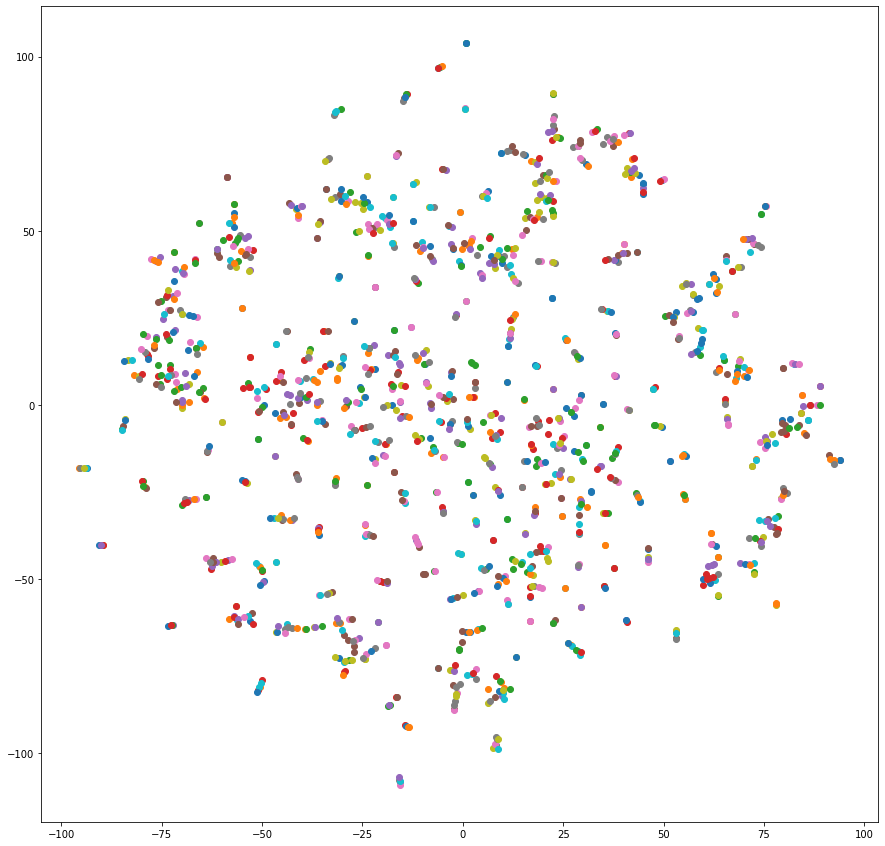

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i in range(df_transformed.shape[0]):
  plt.scatter(df_transformed[i, 0], df_transformed[i, 1])
  # plt.text(df_transformed[i, 0], df_transformed[i, 1], df.index[i])

## Analyzing with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_transformed_pca = pca.fit_transform(df)
df_transformed_pca

array([[ 5.2834511e-01, -5.3093180e-02],
       [ 5.1796544e-01, -1.9746557e-02],
       [-4.8350191e-01, -2.2139589e-04],
       ...,
       [-3.9059192e-01,  2.0826969e-03],
       [ 5.8791850e-02, -6.4150803e-03],
       [-2.5295300e-04, -8.5454609e-04]], dtype=float32)

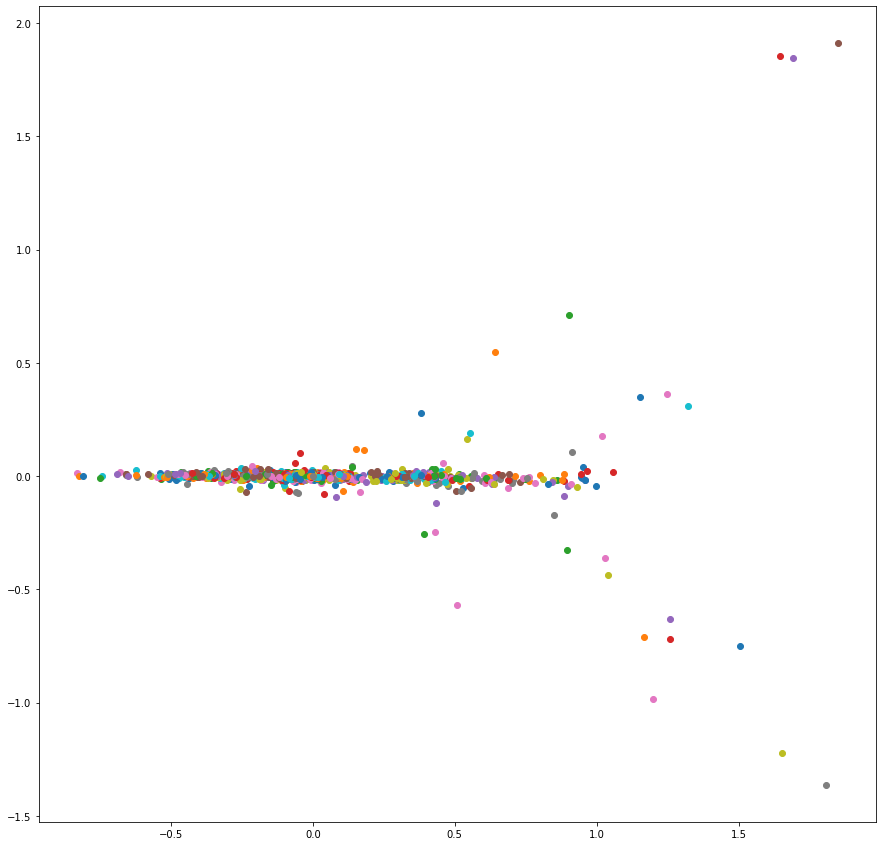

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i in range(df_transformed_pca.shape[0]):
  plt.scatter(df_transformed_pca[i, 0], df_transformed_pca[i, 1])
  # plt.text(df_transformed_pca[i, 0], df_transformed_pca[i, 1], df.index[i])

## Analyzing with [UMAP](https://arxiv.org/abs/1802.03426)


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap

um = umap.UMAP(n_neighbors = 3, random_state = 42)
df_transformed_umap = um.fit(df)
df_transformed_umap

UMAP(n_neighbors=3, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
df_transformed_umap.embedding_

array([[-3.105262  , -7.0392528 ],
       [-3.0324612 , -7.258945  ],
       [ 0.62525433,  7.282912  ],
       ...,
       [18.245468  , -2.1651065 ],
       [ 4.0492587 ,  4.273646  ],
       [ 6.639199  ,  0.41132283]], dtype=float32)

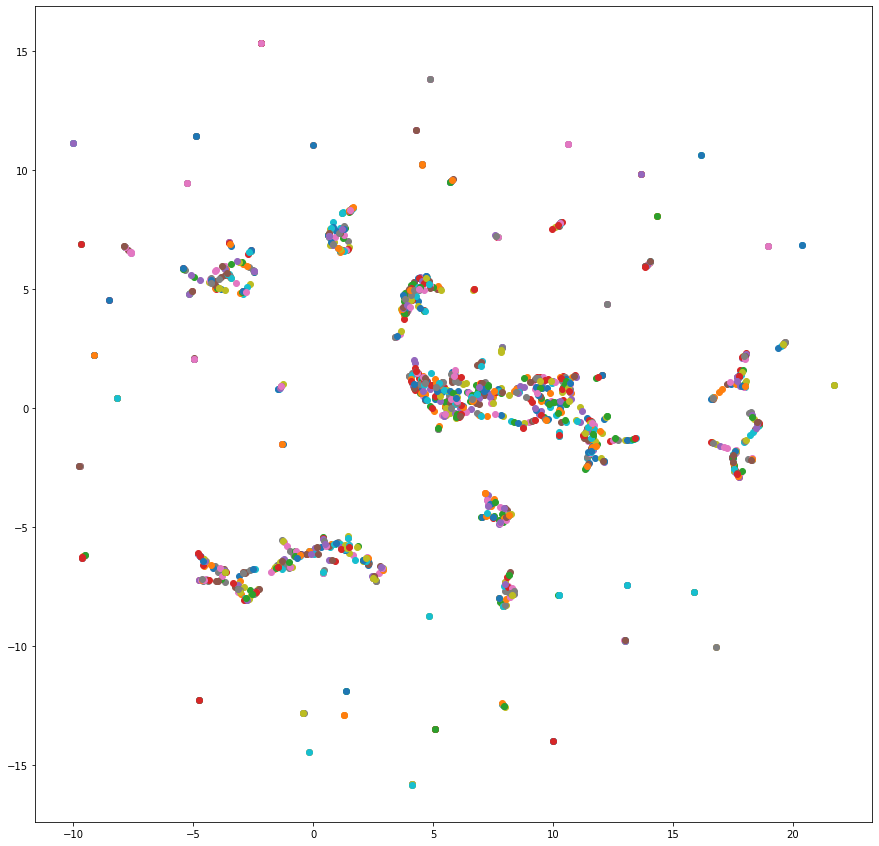

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i in range(df_transformed_umap.embedding_.shape[0]):
  plt.scatter(df_transformed_umap.embedding_[i, 0], df_transformed_umap.embedding_[i, 1])
  # plt.text(df_transformed_umap.embedding_[i, 0], df_transformed_umap.embedding_[i, 1], df.index[i])

## Using KMeans Clustering to find proper clusters of Entities and Relationships

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []; inertias = []
mapping1 = {}; mapping2 = {}
K = range(1, min(len(df.index), 50))

final_df_emb = df_transformed_umap.embedding_

for i in K:
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++').fit(final_df_emb)
  distortions.append(sum(np.min(cdist(final_df_emb, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / final_df_emb.shape[0])
  inertias.append(kmeanModel.inertia_)
  mapping1[i] = sum(np.min(cdist(final_df_emb, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / final_df_emb.shape[0]
  mapping2[i] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 7.826615390692551
2 : 6.155085219994791
3 : 4.581575821036689
4 : 3.8418307728515977
5 : 3.413880326572473
6 : 2.959186637203907
7 : 2.572347707427975
8 : 2.3734129535578443
9 : 2.2147233331825857
10 : 2.064417607845613
11 : 1.890926324077903
12 : 1.8055941335036814
13 : 1.7744920369320867
14 : 1.6621023006735836
15 : 1.5983235218153704
16 : 1.4994215047560377
17 : 1.4319905332600549
18 : 1.3890673979939139
19 : 1.3298375463520988
20 : 1.252123952317513
21 : 1.2139905408935387
22 : 1.170098993592657
23 : 1.147465318508964
24 : 1.0538474457636406
25 : 1.0256799087103143
26 : 1.0301954539131426
27 : 0.9718853166692765
28 : 0.9419407633778819
29 : 0.9311021839308071
30 : 0.9057843408129506
31 : 0.9027580038324728
32 : 0.8717253489427517
33 : 0.8554922165679164
34 : 0.8320804693934148
35 : 0.7994385277463654
36 : 0.7981945974468279
37 : 0.7752802188583672
38 : 0.7563895733539338
39 : 0.7374228929757038
40 : 0.7219566042429163
41 : 0.7141412583429233
42 : 0.6912841750886761
43 : 0.67886

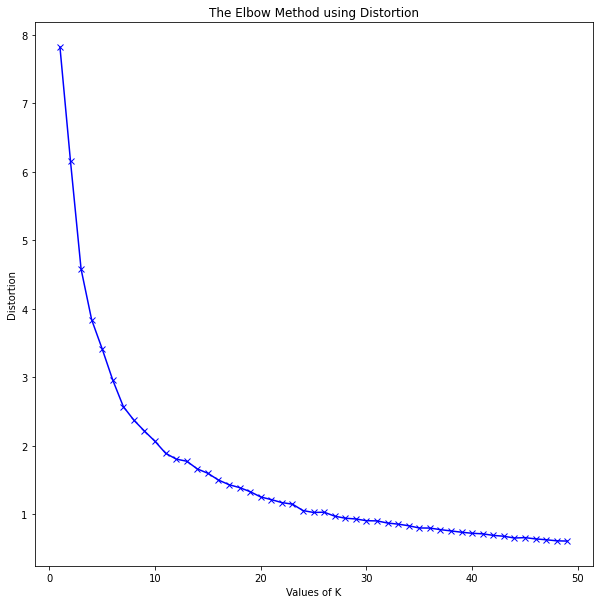

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

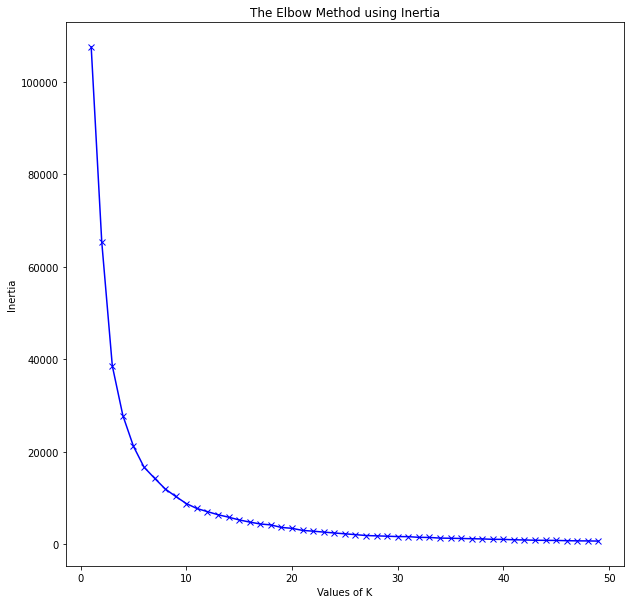

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
optimal_k = 10

kmeanModel = KMeans(n_clusters = optimal_k, init = 'k-means++').fit(final_df_emb)
y_pred = kmeanModel.predict(final_df_emb)

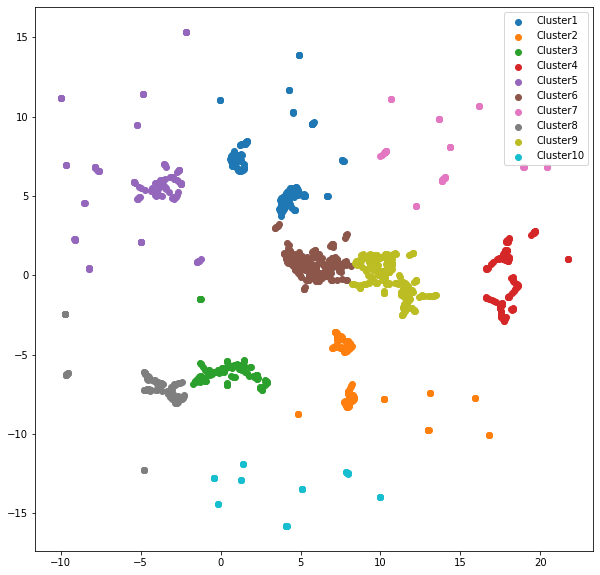

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(optimal_k):
  plt.scatter(final_df_emb[y_pred == i, 0], final_df_emb[y_pred == i, 1], label = "Cluster" + str(i+1))
  plt.legend()

In [ ]:
clusters = {}
for i in range(optimal_k):
  clusters[i+1] = df.index[y_pred == i]

for key in clusters:
  print(key, " => ", clusters[key])

1  =>  Index(['Do the rich get richer? An empirical analysis of the BitCoin transaction network',
       'limited',
       'a novel digital currency system , where the complete list of transactions is publicly available',
       'publicly available',
       'that linear preferential attachment drives the growth of the network of transactions',
       'Investigating the microscopic statistics of money movement Dániel Kondor',
       'handled', 'downloaded', 'compiled',
       'two distinct phases Bitcoin which',
       ...
       'the price', 'the market',
       'When the price is clearly out of bounds ( for example the pre - April 2013 period for the Bitcoin market )',
       'called', 'entirely based on readily available public information',
       'Our main result', 'quite remarkable',
       'not able to predict when a potential crash will happen -if a potential crash happens at all',
       'outperform', 'expanding'],
      dtype='object', length=186)
2  =>  Index(['analyze',
    

# Building Ontology specifically for relation

In [ ]:
import numpy as np
np_trip = np.array(triplets)
np_trip.shape

(752, 3)

In [ ]:
relations = np_trip[:, 1]
relations = [[i] for i in relations]
relations

[['is author of'],
 ['limited'],
 ['employed'],
 ['employed'],
 ['compared'],
 ['analyze'],
 ['is'],
 ['is'],
 ['reconstruct'],
 ['extract'],
 ['analyze'],
 ['find'],
 ['drives'],
 ['study'],
 ['taking'],
 ['measure'],
 ['Investigating'],
 ['find'],
 ['report'],
 ['associated'],
 ['preformed'],
 ['is'],
 ['is'],
 ['handled'],
 ['is'],
 ['is'],
 ['is'],
 ['downloaded'],
 ['compiled'],
 ['extracted'],
 ['studied'],
 ['investigated'],
 ['taking'],
 ['Measuring'],
 ['identified'],
 ['is'],
 ['is'],
 ['is'],
 ['is'],
 ['was'],
 ['accepted'],
 ['accepted'],
 ['is'],
 ['is'],
 ['was'],
 ['characterized'],
 ['is'],
 ['is'],
 ['received'],
 ['received'],
 ['attracted'],
 ['is'],
 ['is'],
 ['function'],
 ['characterized'],
 ['measured'],
 ['finding'],
 ['drives'],
 ['measured'],
 ['found'],
 ['is'],
 ['is'],
 ['is'],
 ['is'],
 ['found'],
 ['drives'],
 ['Investigating'],
 ['identified'],
 ['associated'],
 ['implying'],
 ['believe'],
 ['has'],
 ['make'],
 ['is author of'],
 ['Designed'],
 ['compet

In [ ]:
from gensim.models import Word2Vec
embedding_size = 200
model_rel = Word2Vec(relations, min_count = 1, size = embedding_size, workers = 3, window = 3, sg = 1)

In [ ]:
model_rel.build_vocab(relations, update = True)
model_rel.train(relations, total_examples = model_rel.corpus_count, epochs = 100)

(49865, 75200)

In [ ]:
model_rel.wv.vocab

{'is author of': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247d10>,
 'limited': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247c10>,
 'employed': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247090>,
 'compared': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247b10>,
 'analyze': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247f50>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e6d0>,
 'reconstruct': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26eb50>,
 'extract': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e5d0>,
 'find': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247750>,
 'drives': <gensim.models.keyedvectors.Vocab at 0x7f5b8d247510>,
 'study': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e650>,
 'taking': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e050>,
 'measure': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e3d0>,
 'Investigating': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e410>,
 'report': <gensim.models.keyedvectors.Vocab at 0x7f5b8d26e550>,
 'asso

## Finding Most Frequent Relationships

In [ ]:
unique, counts = np.unique(relations, return_counts = True)
sorted_relations = {}
for y, x in sorted(zip(counts, unique), reverse = True):
  sorted_relations[x] = y
sorted_relations 

{'is': 95,
 'be': 23,
 'are': 22,
 'is not': 15,
 'based': 13,
 'is author of': 10,
 'has': 9,
 'find': 9,
 'lead': 8,
 'have': 8,
 'claim': 7,
 'used': 6,
 'sell': 6,
 'observe': 6,
 'found': 6,
 'driven': 6,
 'dreamed': 6,
 'creating': 6,
 'cause': 6,
 'becomes': 6,
 'was': 5,
 'take': 5,
 'show': 5,
 'leads': 5,
 'identified': 5,
 'drives': 5,
 'buy': 5,
 'would': 4,
 'suggest': 4,
 'made': 4,
 'including': 4,
 'identify': 4,
 'driving': 4,
 'associated': 4,
 'allows': 4,
 'accepted': 4,
 'were': 3,
 'validated': 3,
 'using': 3,
 'think': 3,
 'suggests': 3,
 'study': 3,
 'shown': 3,
 'reproduce': 3,
 'remains': 3,
 'reconstruct': 3,
 'put': 3,
 'provides': 3,
 'provide': 3,
 'propose': 3,
 'measured': 3,
 'make': 3,
 'leading': 3,
 'known': 3,
 'give': 3,
 'determine': 3,
 'created': 3,
 'confirm': 3,
 'compared': 3,
 'believe': 3,
 'been': 3,
 'become': 3,
 'backed': 3,
 'allowed': 3,
 'yields': 2,
 "was n't": 2,
 'wanted': 2,
 'views': 2,
 'took': 2,
 'taking': 2,
 'studied': 2,
 

In [ ]:
import pandas as pd

rel_df = pd.DataFrame()
for i in range(embedding_size):
  rel_df[i] = np.nan
for i in sorted_relations:
  rel_df.loc[i] = model_rel[i]

rel_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
is,-0.002320,0.000174,0.001488,-0.000880,-0.002139,0.001777,-0.001233,0.001830,0.002493,0.001024,...,0.002257,-0.000172,0.001608,0.000149,-0.000845,0.000244,-0.000638,0.002061,-0.000404,-0.001429
be,0.002101,0.000469,0.001054,0.002249,-0.002487,-0.001287,0.000543,0.000762,0.000820,-0.001472,...,0.002339,-0.001368,-0.000943,0.001991,-0.001845,-0.001982,0.002327,0.001280,-0.000088,0.001271
are,0.001878,-0.000628,-0.000496,0.000605,-0.001400,-0.001082,0.000699,-0.001917,-0.001033,0.001532,...,0.002088,0.000171,-0.000290,-0.000850,0.002381,-0.000542,-0.001069,0.001634,-0.001187,-0.001107
is not,0.002477,0.002461,-0.002307,0.000805,0.001384,0.000515,-0.000104,-0.001928,0.000717,0.001140,...,0.001921,0.001925,-0.000811,-0.000509,0.000105,0.000159,0.000203,0.001053,-0.001058,0.000661
based,0.001021,0.001810,-0.000130,0.000654,-0.001149,-0.000029,0.000361,0.000401,0.001735,0.001945,...,0.001721,0.000864,0.000876,-0.002379,0.001060,-0.002053,-0.000068,-0.002290,0.000988,0.001868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nor rely,-0.000035,0.001795,0.001514,0.001820,-0.001211,0.002030,0.000274,0.000638,0.000265,0.001030,...,-0.002415,-0.002482,0.001846,0.002181,0.001650,-0.001774,0.001555,0.000108,-0.000072,-0.000427
Moving,0.001917,-0.001537,-0.002101,0.000125,-0.001554,0.000774,-0.001236,-0.001833,-0.001618,-0.001603,...,0.001078,-0.002491,0.000886,-0.001293,0.000013,-0.001552,0.001070,0.000093,-0.000994,0.000569
Measuring,-0.001319,-0.001271,0.000247,-0.001104,0.002078,0.000656,-0.002177,-0.001200,0.000675,0.000988,...,0.001540,0.000061,0.000555,0.000722,0.001541,0.001672,-0.001495,0.000490,-0.001010,-0.000292
Designed,0.001853,0.002226,-0.002228,-0.001461,0.002259,0.002457,0.001780,-0.002261,0.000396,-0.000103,...,0.000714,0.000611,0.000942,0.001891,0.000013,0.001391,0.002032,0.002012,0.002407,-0.000304


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap

rel_um = umap.UMAP(n_neighbors = 2, random_state = 42)
rel_df_transformed_umap = rel_um.fit(rel_df)
rel_df_transformed_umap

UMAP(n_neighbors=2, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

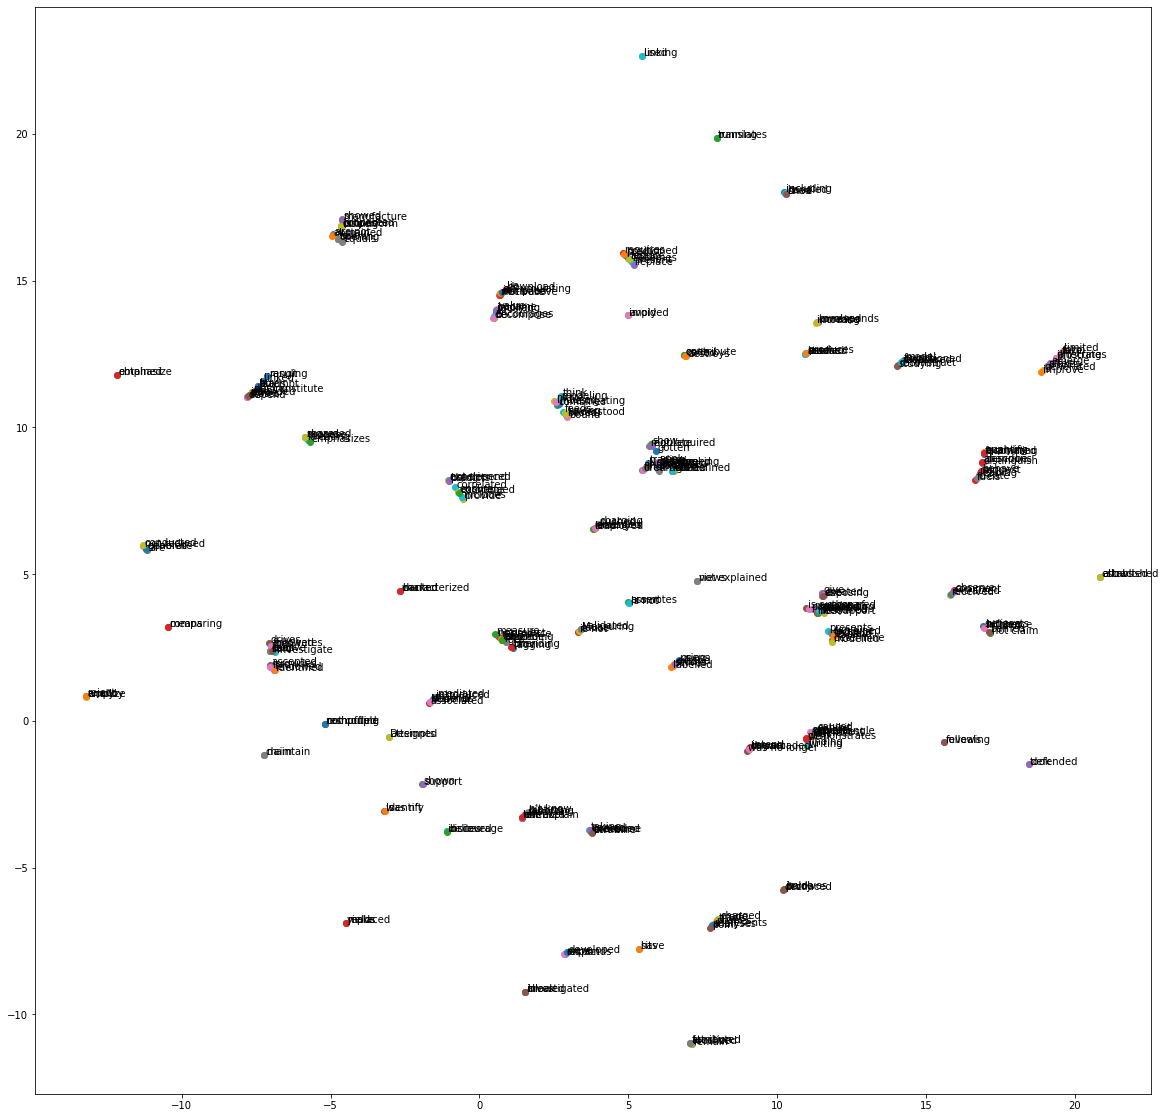

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(rel_df_transformed_umap.embedding_.shape[0]):
  plt.scatter(rel_df_transformed_umap.embedding_[i, 0], rel_df_transformed_umap.embedding_[i, 1])
  plt.text(rel_df_transformed_umap.embedding_[i, 0]+0.05, rel_df_transformed_umap.embedding_[i, 1]+0.01, rel_df.index[i])

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []; inertias = []
mapping1 = {}; mapping2 = {}
K = range(1, min(len(rel_df.index), 50))

final_df_emb = rel_df_transformed_umap.embedding_

for i in K:
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++').fit(final_df_emb)
  distortions.append(sum(np.min(cdist(final_df_emb, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / final_df_emb.shape[0])
  inertias.append(kmeanModel.inertia_)
  mapping1[i] = sum(np.min(cdist(final_df_emb, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / final_df_emb.shape[0]
  mapping2[i] = kmeanModel.inertia_

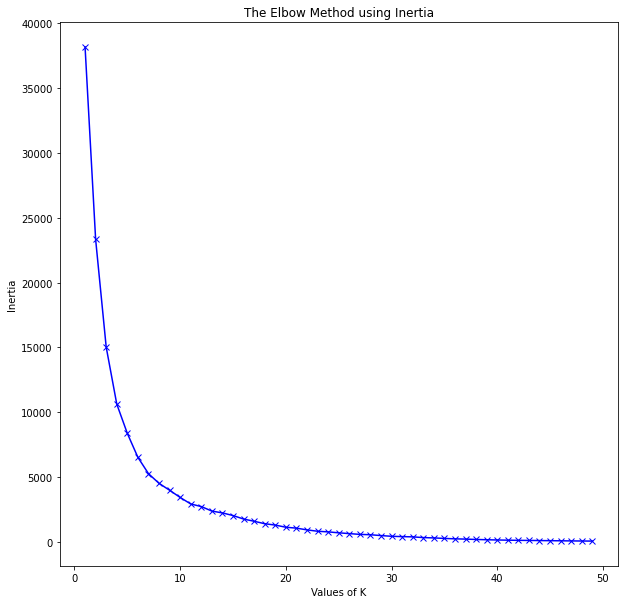

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
optimal_k = 30

kmeanModel = KMeans(n_clusters = optimal_k, init = 'k-means++').fit(final_df_emb)
y_pred = kmeanModel.predict(final_df_emb)

In [ ]:
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

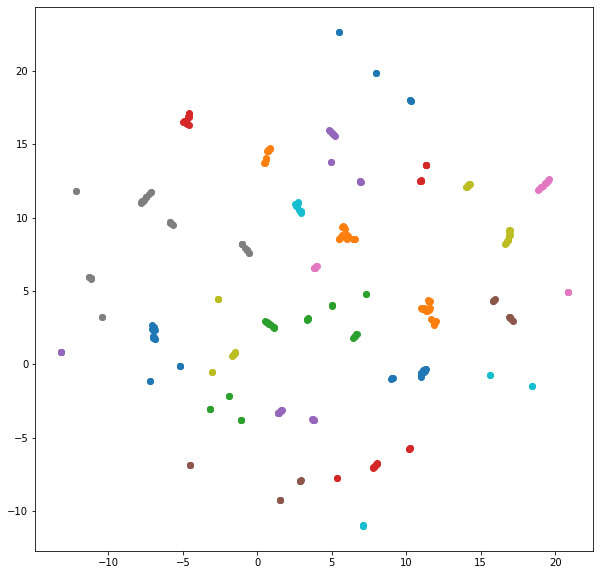

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(optimal_k):
  plt.scatter(final_df_emb[y_pred == i, 0], final_df_emb[y_pred == i, 1], label = "Cluster" + str(i+1))

In [ ]:
clusters = {}
for i in range(optimal_k):
  clusters[i+1] = rel_df.index[y_pred == i]

for key in clusters:
  print(key, " => ", clusters[key])

1  =>  Index(['driven', 'put', 'known', 'not invest', 'writing', 'wish',
       'was no longer', 'points', 'interact', 'intend', 'impact', 'finding',
       'explore', 'exhibit', 'downloaded', 'disentangle', 'demonstrates',
       'caused'],
      dtype='object')
2  =>  Index(['is', 'be', 'motivate', 'implying', 'download', 'value', 'tackled',
       'not believe', 'lie', 'encourages', 'decompose', 'compiled', 'became',
       'accumulating'],
      dtype='object')
3  =>  Index(['identify', 'shown', 'was n't', ''s', 'support', 'incites',
       'discourage', 'believed'],
      dtype='object')
4  =>  Index(['been', 'studied', 'involved', 'corresponds', 'reached', 'produces',
       'knowing', 'increase', 'assess'],
      dtype='object')
5  =>  Index(['would', 'analyze', 'reject', 'employ'], dtype='object')
6  =>  Index(['observe', 'suggests', 'believe', 'received', 'not claim', 'influence',
       'hitches', 'extracted', 'comment', 'baffled'],
      dtype='object')
7  =>  Index(['lead',

In [ ]:
## Calculating AVG SIM for each cluster

cluster_avg_sim = {}
for key in clusters:
  rel_sum_sim = 0
  for i in range(len(clusters[key])-1):
    for j in range(i + 1, len(clusters[key])):
      rel_sum_sim += model_rel.similarity(clusters[key][i], clusters[key][j])
  total_combinations = len(clusters[key]) * (len(clusters[key])-1) / 2
  cluster_avg_sim[key] = rel_sum_sim / (total_combinations + 1e-4)
cluster_avg_sim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


{1: 0.02311869455726095,
 2: 0.04380238702132598,
 3: 0.06422850397787651,
 4: 0.0544386064756387,
 5: 0.0826279902655479,
 6: 0.04585640897054595,
 7: 0.09258140641557554,
 8: 0.017411321535495135,
 9: 0.040756770510540885,
 10: 0.10448197109838603,
 11: 0.022346951505274673,
 12: 0.017987241238306598,
 13: 0.020626375865322098,
 14: 0.049138983079138686,
 15: 0.01745356497058247,
 16: 0.06573032064498899,
 17: 0.045459825854197285,
 18: 0.03592952373120448,
 19: 0.05616454237580326,
 20: 0.031508118281929336,
 21: 0.07824359610203921,
 22: 0.037489978232619944,
 23: 0.023369322860919355,
 24: 0.04876874799040836,
 25: 0.027312813357863244,
 26: 0.21009982150775788,
 27: 0.1408425560673373,
 28: 0.07223973767243107,
 29: 0.03167356293440333,
 30: 0.08326480033343991}

In [ ]:
## Sorting each cluster w.r.t. AVG SIM value
sorted_sim_clusters = dict(sorted(cluster_avg_sim.items(), key = lambda x: x[1], reverse = True))
sorted_sim_clusters

{26: 0.21009982150775788,
 27: 0.1408425560673373,
 10: 0.10448197109838603,
 7: 0.09258140641557554,
 30: 0.08326480033343991,
 5: 0.0826279902655479,
 21: 0.07824359610203921,
 28: 0.07223973767243107,
 16: 0.06573032064498899,
 3: 0.06422850397787651,
 19: 0.05616454237580326,
 4: 0.0544386064756387,
 14: 0.049138983079138686,
 24: 0.04876874799040836,
 6: 0.04585640897054595,
 17: 0.045459825854197285,
 2: 0.04380238702132598,
 9: 0.040756770510540885,
 22: 0.037489978232619944,
 18: 0.03592952373120448,
 29: 0.03167356293440333,
 20: 0.031508118281929336,
 25: 0.027312813357863244,
 23: 0.023369322860919355,
 1: 0.02311869455726095,
 11: 0.022346951505274673,
 13: 0.020626375865322098,
 12: 0.017987241238306598,
 15: 0.01745356497058247,
 8: 0.017411321535495135}

In [ ]:
## Printing TOP Clusters where avg similarity >= 0.025
top_k_dict = {}
top_k = np.sum(np.array(list(sorted_sim_clusters.values())) >= 0.025)
for i in list(sorted_sim_clusters.keys())[:top_k]:
  top_k_dict[i] = clusters[i]
top_k_dict

{26: Index(['make', 'yields', 'replaced'], dtype='object'),
 27: Index(['allows', 'established', 'attracted'], dtype='object'),
 10: Index(['remain', 'localized', 'function', 'attributed'], dtype='object'),
 7: Index(['lead', 'employed', 'emerged', 'pushed', 'classifies', 'charging'], dtype='object'),
 30: Index(['took', 'reveals', 'following', 'defended'], dtype='object'),
 5: Index(['would', 'analyze', 'reject', 'employ'], dtype='object'),
 21: Index(['used', 'including', 'translates', 'shed', 'running', 'linking',
        'handled', 'drive'],
       dtype='object'),
 28: Index(['are', 'not reduced', 'means', 'generate', 'enabled', 'conducted',
        'comparing'],
       dtype='object'),
 16: Index(['were', 'allowed', 'investigated', 'expect', 'break', 'responds',
        'developed'],
       dtype='object'),
 3: Index(['identify', 'shown', 'was n't', ''s', 'support', 'incites',
        'discourage', 'believed'],
       dtype='object'),
 19: Index(['suggest', 'leading', 'describe',

## Building final Relationship Ontology

In [ ]:
## Selecting TOP 10 most frequent relationship
relation_ontology = []
relation_ontology.extend(list(sorted_relations.keys())[:10])
relation_ontology

['is',
 'be',
 'are',
 'is not',
 'based',
 'is author of',
 'has',
 'find',
 'lead',
 'have']

In [ ]:
## Selecting most frequent word from clusters having avg similarity >= 0.025
ontology_from_clusters = []
for key, value in top_k_dict.items():
  max_count_value = sorted_relations[value[0]]
  value_to_append = None
  for i in value:
    if i in relation_ontology:
      break
    else:
      if sorted_relations[i] >= max_count_value:
        max_count_value = max(sorted_relations[i], max_count_value)
        value_to_append = i
  ontology_from_clusters.append(value_to_append)
ontology_from_clusters = [i for i in ontology_from_clusters if i is not None]
ontology_from_clusters

['make',
 'allows',
 'remain',
 'took',
 'would',
 'used',
 'allowed',
 'identify',
 'suggest',
 'been',
 'sell',
 'observe',
 'take',
 'found',
 'provide',
 'associated',
 'not explain']

In [ ]:
## Joining both these lists to get final relation ontology
final_rel_ontology = []
final_rel_ontology.extend(relation_ontology)
final_rel_ontology.extend(ontology_from_clusters)
final_rel_ontology

['is',
 'be',
 'are',
 'is not',
 'based',
 'is author of',
 'has',
 'find',
 'lead',
 'have',
 'make',
 'allows',
 'remain',
 'took',
 'would',
 'used',
 'allowed',
 'identify',
 'suggest',
 'been',
 'sell',
 'observe',
 'take',
 'found',
 'provide',
 'associated',
 'not explain']

In [57]:
len(final_rel_ontology)

27